In [1]:
import os
import csv
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
pd.set_option('display.max_colwidth', -1)
import glob
from IPython.display import display, HTML

## Parsing Data

In [2]:
categories = {}
categories['af'] = 'Acuerdo Final'
categories['ch'] = 'Comisión Histórica del Conflicto y sus Víctimas'
categories['docs'] = 'Documentos'

In [3]:
out_file = 'data/mesa_files_original.csv'
row = ['ID', 'path', 'category', 'sub-category', 'date', 'filename']
hdocs = []
idDoc = -1
for  files in os.walk('data/mesa'):        
    if files[2]:
        for filename in files[2]:
            idDoc = idDoc + 1
            path = files[0]            
            key = path[10:]
            cat = categories[key if key.find('/') is -1 else key[:key.find('/')]]
            subCat = '' if key.find('/') is -1 else key[key.find('/') + 1:]
            date = None
            doc = [idDoc, path, cat, subCat, date, filename]
            hdocs.append(doc)
            
with open(out_file, 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(row)
    wr.writerows(hdocs)

## Cantidad total de documentos

In [4]:
df = pd.read_csv('data/mesa_files.csv')
df.columns = ['ID', 'path', 'category', 'sub_cat', 'date', 'filename']
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y");

In [5]:
df['ID'].count()

138

# Frecuencia 

## Cantidad de documentos emitidos por Año

In [6]:
dftime = df.groupby([df['date'].dt.year]).agg({'ID':'count'})
dftime.columns = ['Cantidad']
dftime

,Cantidad
date,
2012.0,7
2013.0,25
2014.0,20
2015.0,19
2016.0,55


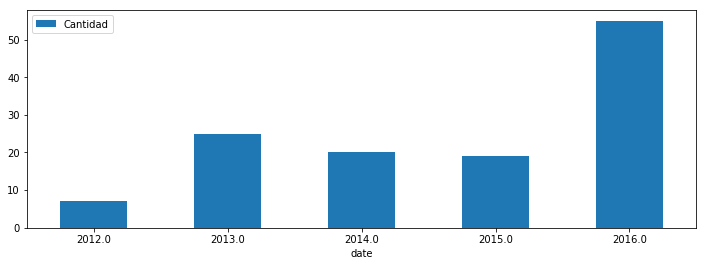

In [7]:
dftime.plot(kind="bar", rot=0)

## Cantidad de documentos emitidos diariamente (15 días con mayor cantidad de docs emitidos)

In [8]:
dftime2 = df.groupby(df['date']).agg({'ID':'count'})
dftime2.columns = ['Cantidad']
dftime2 = dftime2.sort_values(by='Cantidad', ascending=False).head(15)
dftime2

,Cantidad
date,
2016-08-05,9
2013-12-08,3
2016-08-09,2
2014-05-16,2
2016-11-24,2
2016-11-22,2
2013-06-21,2
2015-10-17,2
2015-12-15,2


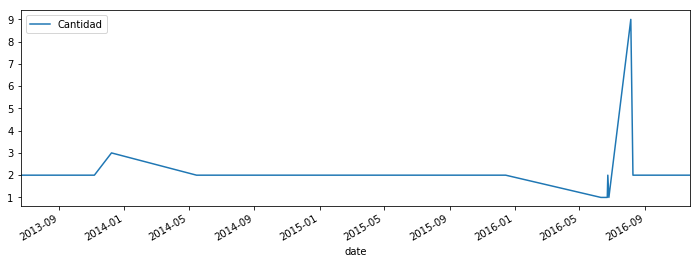

In [9]:
dftime2.plot()

## Documentos emitidos los 15 días de mayor emisión de documentos 

In [10]:
for index, row in dftime2.iterrows():
    print (index , ' --- ', row['Cantidad'])
    df3 = df[df['date']==index]
    df3 = df3.drop('path', axis=1)
    display(df3)

2016-08-05 00:00:00  ---  9


,ID,category,sub_cat,date,filename
106,106,Documentos,Comunicados,2016-08-05,comunicado-conjunto-83-la-habana-cuba-5-de-agosto-de-2016-1470420396.pdf
113,113,Documentos,Borradores,2016-08-05,cese_y_dejacion_alta-1467636327.pdf
114,114,Documentos,Borradores,2016-08-05,05-1470450340.-protocolo-de-seguridad-1470450340.pdf
118,118,Documentos,Borradores,2016-08-05,07-1470425889.-dejacion-de-las-armas-1470425889.pdf
119,119,Documentos,Borradores,2016-08-05,04-1470425588.-protocolo-dispositivos-en-el-terreno-y-zonas-zvtn-ptn-pdf-1470425588.pdf
120,120,Documentos,Borradores,2016-08-05,01-1470425137.-protocolo-introduccion-1470425137.pdf
122,122,Documentos,Borradores,2016-08-05,03-1470450177.-protocolos-mmv-1470450177.pdf
123,123,Documentos,Borradores,2016-08-05,02-1470425335.-protocolo-reglas-que-rigen-el-cese-al-fuego-y-da-pdf-1470425335.pdf
125,125,Documentos,Borradores,2016-08-05,06-1470425799.-protocolo-logistica-pdf-1470425799.pdf


2013-12-08 00:00:00  ---  3


,ID,category,sub_cat,date,filename
2,2,Documentos,Informes,2013-12-08,"Informe Conjunto Nro 2, Punto 02 de la Agenda - 08 diciembre 2013 - Versi_n Espa_ol.pdf"
3,3,Documentos,Informes,2013-12-08,Informe de Participaci_n - 08 de diciembre 2013.pdf
42,42,Documentos,Comunicados,2013-12-08,"Comunica Conjunto, La Habana, 08 de diciembre de 2013 - Versi_n Espa_ol.pdf"


2016-08-09 00:00:00  ---  2


,ID,category,sub_cat,date,filename
79,79,Documentos,Comunicados,2016-08-09,comunicado-conjunto-84-la-habana-cuba-9-de-agosto-de-2016-1470756858.pdf
80,80,Documentos,Comunicados,2016-08-09,comunicado-conjunto-85-villavicencio-meta-9-de-agosto-de-2016-1470784649.pdf


2014-05-16 00:00:00  ---  2


,ID,category,sub_cat,date,filename
45,45,Documentos,Comunicados,2014-05-16,"Comunicado Conjunto, La Habana, 16 de mayo de 2014, Versi_n Espa_ol.pdf"
115,115,Documentos,Borradores,2014-05-16,Borrador Conjunto - Soluci_n al problema de las drogas il_citas.pdf


2016-11-24 00:00:00  ---  2


,ID,category,sub_cat,date,filename
0,0,Acuerdo Final,Acuerdo Final,2016-11-24,24-1480106030.11-1480106030.2016nuevoacuerdofinal-1480106030.pdf
94,94,Documentos,Comunicados,2016-11-24,comunicado-conjunto-7-fe-de-erratas-24-de-noviembre-de-2016-1480001802.pdf


2016-11-22 00:00:00  ---  2


,ID,category,sub_cat,date,filename
70,70,Documentos,Comunicados,2016-11-22,comunicado-conjunto-66-la-habana-22-de-enero-de-2016-1453483758.pdf
99,99,Documentos,Comunicados,2016-11-22,comunicado-conjunto-6-22-de-noviembre-de-2016-1479856861.pdf


2013-06-21 00:00:00  ---  2


,ID,category,sub_cat,date,filename
1,1,Documentos,Informes,2013-06-21,Informe Conjunto 1- Mesa de Conversaciones -Gobierno y Farc - Version Espa_ol.pdf
43,43,Documentos,Comunicados,2013-06-21,"Comunicado Conjunto, La Habana, 21 de junio de 2013 - Versi_n Espa_ol.pdf"


2015-10-17 00:00:00  ---  2


,ID,category,sub_cat,date,filename
7,7,Documentos,Comunicados,2015-10-17,comunicado-conjunto-61-1444419403.pdf
21,21,Documentos,Comunicados,2015-10-17,comunicado-conjunto--1445137230.pdf


2015-12-15 00:00:00  ---  2


,ID,category,sub_cat,date,filename
10,10,Documentos,Comunicados,2015-12-15,comunicado-conjunto-64-15-de-diciembre-de-2015-1450190009.pdf
116,116,Documentos,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.pdf


2016-06-23 00:00:00  ---  2


,ID,category,sub_cat,date,filename
97,97,Documentos,Comunicados,2016-06-23,comunicado-conjunto-no-76-1466705808.-la-habana-cuba-23-de-junio-de-2016-1466705808.pdf
117,117,Documentos,Borradores,2016-06-23,garantias_de_seguriad_alta-1467636465.pdf


2013-11-06 00:00:00  ---  2


,ID,category,sub_cat,date,filename
40,40,Documentos,Comunicados,2013-11-06,"Comunicado Conjunto, La Habana, 06 de noviembre de 2013 - Versi_n Espa_ol.pdf"
121,121,Documentos,Borradores,2013-11-06,Borrador Conjunto - Participaci_n Pol_tica.pdf


2016-08-12 00:00:00  ---  2


,ID,category,sub_cat,date,filename
87,87,Documentos,Comunicados,2016-08-12,comunicado-conjunto-88-la-habana-cuba-12-de-agosto-de-2016-1471003878.pdf
107,107,Documentos,Comunicados,2016-08-12,comunicado-89-villavicencio-agosto-12-de-2016-1471040526.pdf


2016-06-22 00:00:00  ---  1


,ID,category,sub_cat,date,filename
75,75,Documentos,Comunicados,2016-06-22,comunicado-conjunto-no-75-1466605569.-la-habana-cuba-1466605569.-22-de-junio-de-2016-1466605569.pdf


2016-06-10 00:00:00  ---  1


,ID,category,sub_cat,date,filename
93,93,Documentos,Comunicados,2016-06-10,comunicado-conjunto-74-la-habana-cuba-10-de-junio-de-2016-1465571546.pdf


2016-06-25 00:00:00  ---  1


,ID,category,sub_cat,date,filename
71,71,Documentos,Comunicados,2016-06-25,comunicado-conjunto-no-77-1466878158.-la-habana-cuba-1466878158.-25-de-junio-de-2016-1466878158.pdf


## Cantidad de documentos por Categoría

In [11]:
dfCat = df.groupby([df['category'], df['sub_cat']]).agg({'ID':'count'}).sort_values('ID').reset_index()
dfCat.columns = ["Categoría", "Sub-categoría", "Cantidad"]
dfCat

,Categoría,Sub-categoría,Cantidad
0,Acuerdo Final,Acuerdo Final,1
1,Comisión Histórica del Conflicto y sus Víctimas,Relatorias,2
2,Documentos,Informes,5
3,Comisión Histórica del Conflicto y sus Víctimas,Informes,10
4,Documentos,Borradores,13
5,Documentos,Comunicados,107


# Natural Language Processing

In [13]:
stop_words_spanish = ['un', 'una', 'unas', 'unos', 'uno', 'sobre', 'todo', 'también', 'tras', 'otro', 'algún', 'alguno', 'alguna', 'algunos', 'algunas', 'ser', 'es', 'soy', 'eres', 'somos', 'sois', 'estoy', 'esta', 'estamos', 'estais', 'estan', 'como', 'en', 'para', 'atras', 'porque', 'por qué',  'estaba', 'ante', 'antes', 'siendo', 'ambos', 'pero', 'por', 'poder', 'puede', 'puedo', 'podemos', 'podeis', 'pueden', 'fui', 'fue', 'fuimos', 'fueron', 'hacer', 'hago', 'hace', 'hacemos', 'haceis', 'hacen', 'cada', 'fin', 'incluso', 'primero', 'desde', 'conseguir', 'consigo', 'consigue', 'consigues', 'conseguimos', 'consiguen', 'ir', 'voy', 'va', 'vamos', 'vais', 'van', 'vaya', 'gueno', 'ha', 'tener', 'tengo', 'tiene', 'tenemos', 'teneis', 'tienen', 'el', 'la', 'lo', 'las', 'los', 'su', 'aqui', 'mio', 'tuyo', 'ellos', 'ellas', 'nos', 'nosotros', 'vosotros', 'vosotras', 'si', 'dentro', 'solo', 'solamente', 'saber', 'sabes', 'sabe', 'sabemos', 'sabeis', 'saben', 'ultimo', 'largo', 'bastante', 'haces', 'muchos', 'aquellos', 'aquellas', 'sus', 'entonces', 'tiempo', 'verdad', 'verdadero', 'verdadera', 'cierto', 'ciertos', 'cierta', 'ciertas', 'intentar', 'intento', 'intenta', 'intentas', 'intentamos', 'intentais', 'intentan', 'dos', 'bajo', 'arriba', 'encima', 'usar', 'uso', 'usas', 'usa', 'usamos', 'usais', 'usan', 'emplear', 'empleo', 'empleas', 'emplean', 'ampleamos', 'empleais', 'valor', 'muy', 'era', 'eras', 'eramos', 'eran', 'modo', 'bien', 'cual', 'cuando', 'donde', 'mientras', 'quien', 'con', 'entre', 'sin', 'trabajo', 'trabajar', 'trabajas', 'trabaja', 'trabajamos', 'trabajais', 'trabajan', 'podria', 'podrias', 'podriamos', 'podrian', 'podriais', 'yo', 'aquel', 'a', 'en', 'de', 'para', 'por', 'según', 'sin', 'sobre', 'tras', 'bajo', 'contra', 'hacia', 'hasta', 'rt', 'que', 'se', 'no', 'del', 'al', 'http', 'https', 'y', 'más', 'todos', 'año', 'será', 'este', 'vía', 'les', 'ni', 'dice', 'le', 'está', 'qué', 'hay', 'htt', 'quiere', 'nuestra', 'sí', 'of', 'in', 'años', 'firma' , 'firman', 'nuevo', 'hoy', 'ayer', 'inicio', 'ya', 'histórico', 'día','son', 'final', 'and', 'with', 'you', 'mundo', 'gran', 'sol', 'recibe', 'millones',  'gracias', 'hermana', 'fuego', 'me', 'eso',  'we', 'after', 'camino', 'dijo', 'caminos', 'recibirá', 'entiendo', 'mejores', 'mejor', 'deseos', 'lleve', 'nuevamente', 'ahora', 'definitiva', 'ese', 'definitivo', 'han', 'sino', 'tal', 'mismos', 'estos', 'así', 'ver', 'esto', 'esta', 'sido', 'manera', 'sigo']

In [14]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_top_words = 20
n_samples = 2000
n_features = 1000
n_topics = 5
n_top_words = 10

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx,  " ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [15]:
from nltk import ngrams
import operator
from itertools import islice
import string 
from tabulate import tabulate

def stopWordsInGrams(grams):    
    count = 0
    for w in grams:
        if w in stop_words_spanish:
            count = count + 1                
    return count/len(grams)  

def isNumber(s):
    try: 
        int(s)
        float(s)
        return True
    except ValueError:
        return False

def getNGram(text, n, stop_words, m):
    text = text.lower()
    ngramas = ngrams(text.split(), n)
    h_dict = {}   
    for grams in ngramas:
        if stopWordsInGrams(grams) > 0.34:
            continue
        words = ' '.join(grams)        
        words = words.lower() 
        words = ''.join(e for e in words if e.isalnum() or e == ' ')    
        words = words.strip()  
        if  words in stop_words or words in punct_signs or words == '' or words in abc or isNumber(words) or len(words.split(' ')) != n:
             continue
        if words in h_dict:
            h_dict[words] = h_dict[words] + 1
        else: 
            h_dict[words] = 1 
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    if m is -1:
        return list(sorted_dict)
    else:
        return list(islice(sorted_dict, m))

def fetch_files_from(path):
    files = []    
    for filename in glob.glob(os.path.join(path, '*.txt')):
        with open(filename) as f:
            files.append(f.read())
    return files

In [16]:
def printTopicsLDAbyCat(dataset):
    data_samples = dataset[:n_samples]        

    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,
                                           max_features=n_features,
                                           stop_words=stop_words_spanish)

    tfidf = tfidf_vectorizer.fit_transform(data_samples)
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                    max_features=n_features,
                                    stop_words=stop_words_spanish)

    tf = tf_vectorizer.fit_transform(data_samples)

    lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)

    lda.fit(tf)
    tf_feature_names = tf_vectorizer.get_feature_names()
    print_top_words(lda, tf_feature_names, n_top_words)

## 5 Topics por Categoría  LDA from Scikit

In [17]:
for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):     
        if(len(files[2])>0):       
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')    
            dataset = fetch_files_from(path)
            printTopicsLDAbyCat(dataset)

Acuerdo Final --  

Topic #0:  solución movimiento partidos rural respeto fortalecimiento promoción planes cultivos programa
Topic #1:  listados renuncia persecución amnistías indultos tratamientos condicionada artículos policial militar
Topic #2:  planes respeto territorial cultivos rural csivi colectiva proyectos enfoque ilícito
Topic #3:  planes cultivos rural ilícito promoción enfoque sociedad fortalecimiento drogas criminales
Topic #4:  planes rural cultivos promoción enfoque ilícito respeto proyectos sociedad drogas

Documentos -- /Informes 

Topic #0:  estado guerra bogotá país violencia social político estados 000 unidos
Topic #1:  promover social garantías rural comunidades fortalecer estado campo acceso seguridad
Topic #2:  estado guerra bogotá violencia político país durante social frente guerrillas
Topic #3:  estado guerra violencia bogotá social país político estados unidos guerrillas
Topic #4:  estado guerra violencia país social bogotá estados siglo guerrillas militar

D

## Top 20 Unigramas más frecuentes  por Categoría 

In [18]:
abc = string.ascii_lowercase 
punct_signs = string.punctuation
for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):     
        if(len(files[2])>0):       
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')    
            dataset = fetch_files_from(path)
            data = '\n'.join(dataset)
            final = getNGram(data, 1, stop_words_spanish, 20)
            print(tabulate(final, ['Ngram', 'Number']))
            print('---------------------------------')
            print()

Acuerdo Final --  

Ngram             Number
--------------  --------
acuerdo             1087
nacional             672
farcep               595
paz                  556
gobierno             523
especial             395
derechos             385
seguridad            361
conflicto            350
organizaciones       332
página               311
medidas              309
implementación       299
participación        298
política             273
jurisdicción         266
mmv                  264
personas             253
comunidades          230
información          229
---------------------------------

Documentos -- /Informes 

Ngram         Number
----------  --------
colombia        1217
estado           976
conflicto        938
política         821
guerra           787
nacional         762
bogotá           741
violencia        740
social           634
parte            524
sociales         494
país             446
gobierno         440
estados          394
político         385
guerrillas  

# Tagging 

## Top 20 Nombres más mencionados por categoría

In [19]:
file  = open('data/spanish_names.txt', 'r')  
spanish_names = file.readlines()
spanish_names = [s[:-1] for s in spanish_names]

In [22]:
import re   
import operator
from collections import Counter

def extractNamesAndEntities(text):
    i = 0
    hdict = {}
    patron = re.compile('(([A-ZÁÉÍÓÚÑÜ]{1}[a-zñáéíóúü]+)([ ]+de[ ]+la[ ]+)?([ ]+de[ ]+)?([ ]+del[ ]+)?([ ]*[A-ZÁÉÍÓÚÑÜ]{1}[a-zñáéíóúü]+)*)')
    names = patron.findall(text)
    names = [x[0] for x in names if x[0].lower() not in stop_words_spanish]
    for k in names:
        k = k.replace('Según', '')
        k = k.replace('Informes', '')
        k = k.replace('Informe', '')
        k = k.replace('Sistema', '')
        k = k.replace('Universidad', '')
        k = k.replace('Diálogo', '')
        k = k.replace('Invitamos', '')
        k = k.replace('Delegación', '')
        k = k.replace('Valoramos', '')
        k = k.strip()
        for n in spanish_names:            
            if(n is not '' and (n + ' ' in k.upper() or ' ' + n in k.upper() or n == k.upper()) ):       
                if(k in hdict.keys()):
                    hdict[k] = hdict[k] + 1
                else:
                    hdict[k] = 1
                break
    return hdict

def printTopMNames(hdict, m):    
    sorted_dict = sorted(hdict.items(), key=operator.itemgetter(1), reverse=True)
    return list(islice(sorted_dict, m))


for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):     
        if(len(files[2])>0):       
            hdict = {}
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')               
            dataset = fetch_files_from(path)
            text = '\n'.join(dataset)
            hdict = extractNamesAndEntities(text)
            final = printTopMNames(hdict, 20)
            print(tabulate(final, ['Nombre', 'Cantidad']))
            print()


Acuerdo Final --  

Nombre       Cantidad
---------  ----------
Paz               339
José                6
Manuel              2
Juan                2
Cruz                2
Florencia           2
Salvador            1
Remedios            1
Bautista            1
Macarena            1
Jorge               1
Vicente             1

Documentos -- /Informes 

Nombre                 Cantidad
-------------------  ----------
Jorge Giraldo                63
Gaitán                       61
Francisco Gutiérrez          58
Daniel Pécaut                46
Alfredo Molano               38
Paz                          33
María Emma Wills             31
Magdalena                    27
Darío Fajardo                27
Magdalena Medio              24
Carlos                       24
Javier Giraldo               20
Pablo Escobar                19
Francisco                    18
Gustavo Duncan               18
Álvaro                       16
Vicente Torrijos             16
Franco                       15
Mauri